<a href="https://colab.research.google.com/github/Etnawu/Exploratory-Data-Analysis-List-of-World-Cities-by-Population-Density/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of Airbnb data in Toronto


Examination of dataset with detailed listings data.

Data downloaded from: [insideairbnb.com](http://insideairbnb.com/get-the-data/)

Data Dictionary: [Provided by Data provider](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)

License: [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

Expected Update Frequency: Never

# Import

*   import pandas
*   import matplotlib
*   import dataset from Github repo



Data set has previously been trimmed on Excel prior to upload.
Unrelated columns has been removed.
Listings with no reviews have also been removed.





In [181]:
!pip install pandas

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
url = 'https://raw.githubusercontent.com/Etnawu/airbnb2023/main/listings.csv'
df = pd.read_csv('https://raw.githubusercontent.com/Etnawu/airbnb2023/main/listings.csv')

In [184]:
row_count = len(df)
print("Number of rows:", row_count)

Number of rows: 15197


# Questions to answer

Market analysis

*   What is the most common types of listings available in different neighborhoods ?

*   What is the availability of listings across different neighborhoods


Host analysis

* Which hosts have the highest number of listings ?

* Is there any correlation between host response time and reviews ?

Guest Analysis

* What are the most common amenities offered by hosts ?

* Is there any correlation between review scores and other factors such as price, host response time, or listing type?

# Analysis and Visualization

# Types of rentals
Note: Private rooms entails a rental unit within a property while entire homes/apt indicates entire property as rental unit


In [185]:
# Group the dataframe by neighborhood and find the most common room type in each neighborhood, than get unique neighborhoods
most_common_property = df.groupby('neighbourhood_cleansed')['room_type'].agg(lambda x: x.mode()[0])
neighborhoods = most_common_property.index

#Count types of rental type by neighborhood
neighborhood_rtype_counts = df.groupby(['neighbourhood_cleansed', 'room_type']).size()

## Private Rooms

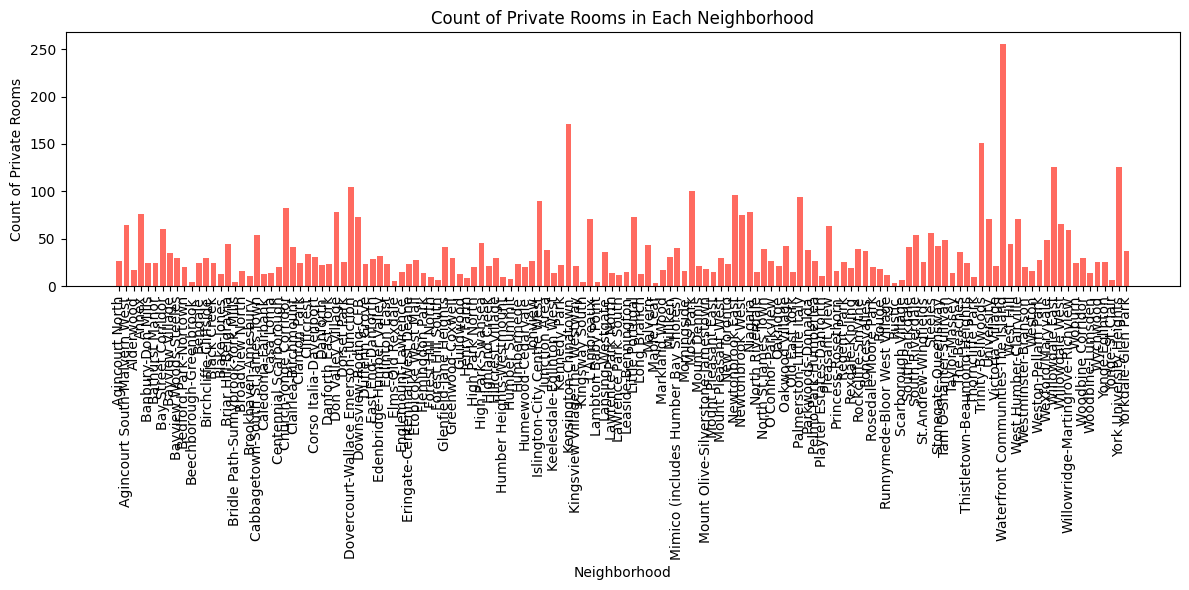

In [186]:
#Get private room available in each unique neighborhood
private_room_counts = neighborhood_rtype_counts.loc[neighborhoods, 'Private room']

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(neighborhoods, private_room_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Private Rooms')
plt.title('Count of Private Rooms in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [194]:
# Sort the private room counts in descending order than get top 20
private_top_20_neighborhoods = private_room_counts.sort_values(ascending=False).head(20)

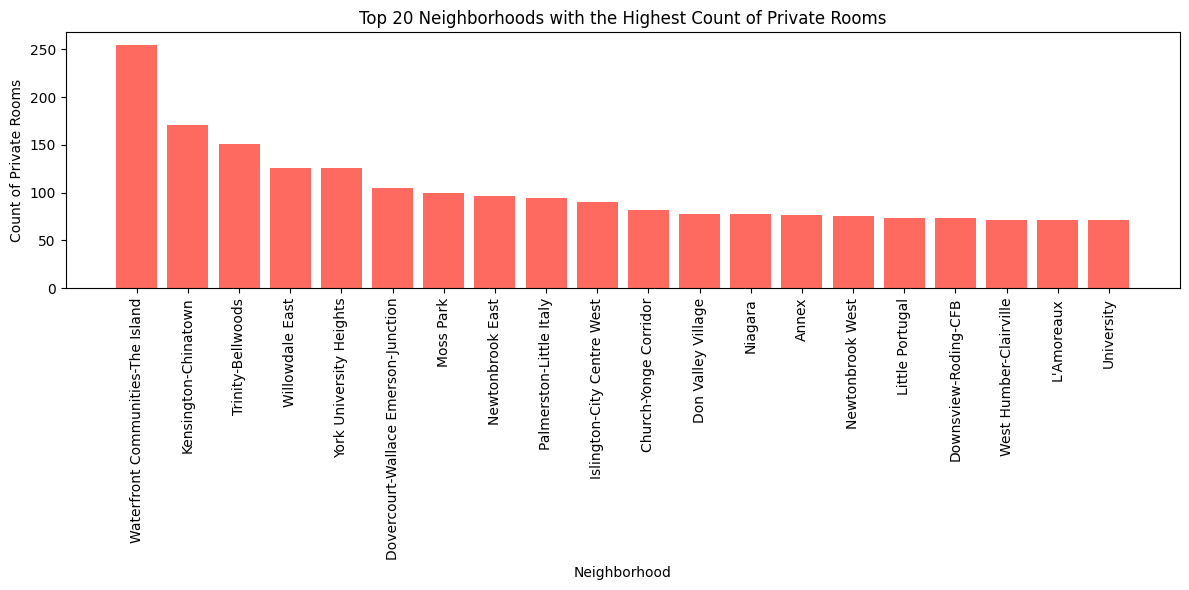

In [195]:
# Extract the neighborhood names and counts
priv_neighborhood_names = private_top_20_neighborhoods.index.get_level_values('neighbourhood_cleansed')
priv_counts = private_top_20_neighborhoods.values

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(priv_neighborhood_names, priv_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Private Rooms')
plt.title('Top 20 Neighborhoods with the Highest Count of Private Rooms')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()


In [203]:
#Average count of private airbnb listings per neighborhood
priv_mean = sum(priv_counts) / len(priv_counts)
print(priv_mean)

103.1


In [199]:
print(private_room_counts.sort_values(ascending=False).head(5))

neighbourhood_cleansed             room_type   
Waterfront Communities-The Island  Private room    255
Kensington-Chinatown               Private room    171
Trinity-Bellwoods                  Private room    151
Willowdale East                    Private room    126
York University Heights            Private room    126
dtype: int64


In the context of private room listings, the average availability per neighborhood is **103.1**. Certain neighborhoods exhibit notably higher levels of availability, indicating a more competitive market for hosts considering renting private rooms in these areas via Airbnb.

**Waterfront Communities-The Island**: **255** private room listings. It's 147% above average availability indicates high competition but with potential high guest turnovers

**Kensington-Chinatown** : **171** private room listings. 66% above average.

**Trinity-Bellwoods**: **151** private
 room listings. 46% above average.

**Willowdale East and York University Heights** :**126** private room listings. 22% above average.





---



## Entire home/apt

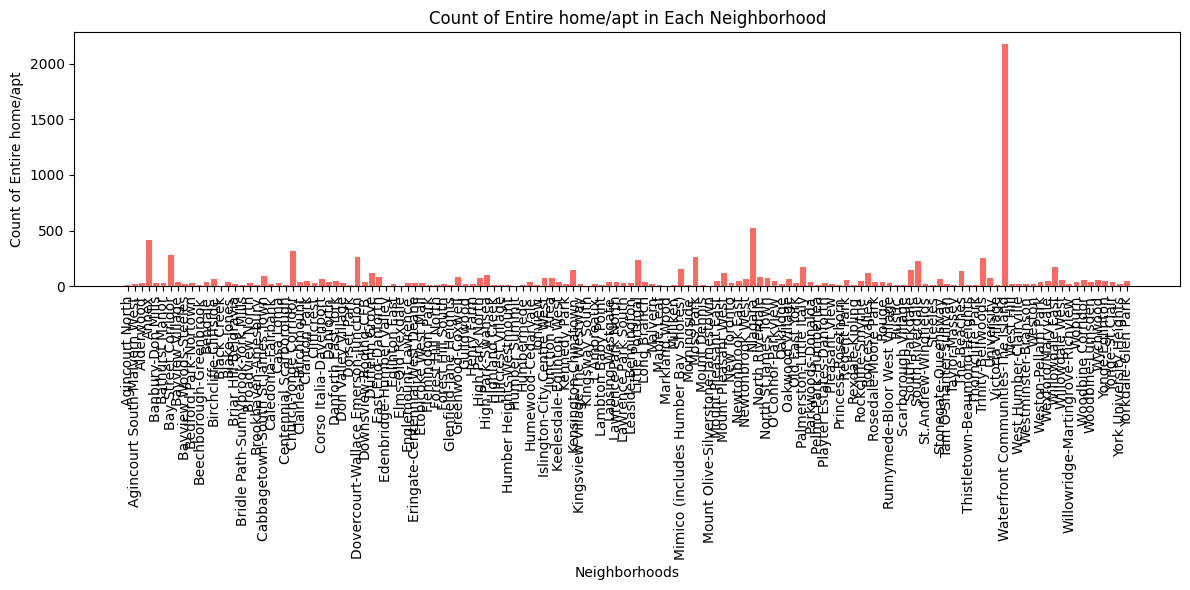

In [221]:
#Get home listing available in each unique neighborhood
entire_counts = neighborhood_rtype_counts.loc[neighborhoods, 'Entire home/apt']

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(neighborhoods, entire_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Entire home/apt')
plt.title('Count of Entire home/apt in Each Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [208]:
# Sort the entire home  counts in descending order than get top 20
entire_top_20_neighborhoods = entire_counts.sort_values(ascending=False).head(20)

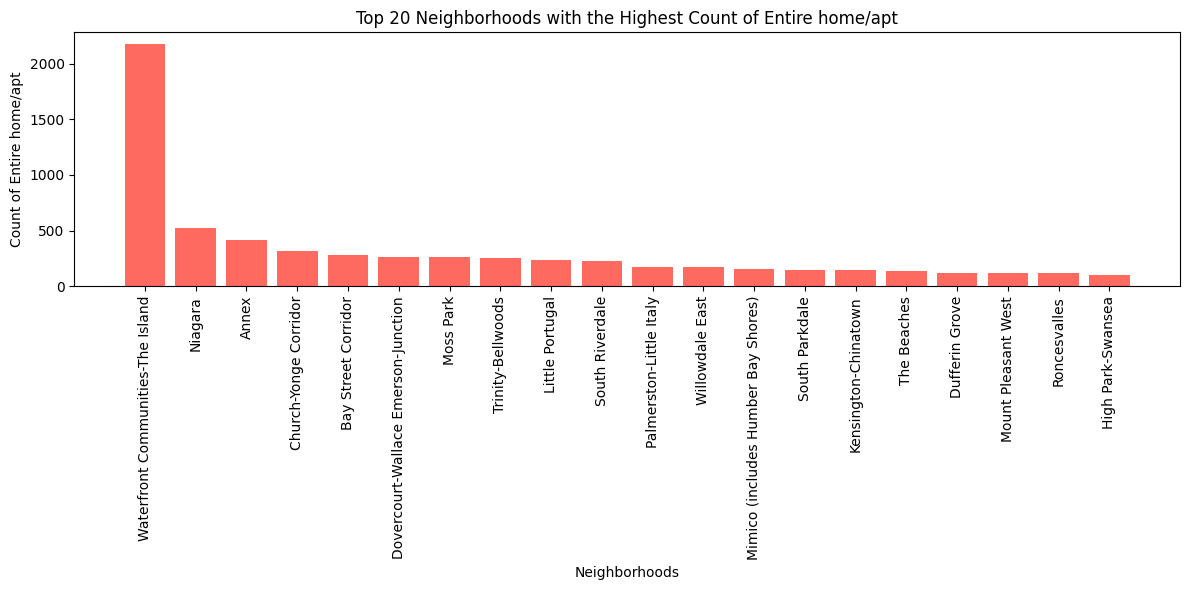

In [220]:
# Extract the neighborhood names and counts
entire_neighborhood_names = entire_top_20_neighborhoods.index.get_level_values('neighbourhood_cleansed')
entire_counts = entire_top_20_neighborhoods.values

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(entire_neighborhood_names, entire_counts, color='#ff6a60')

# Add labels and title
plt.xlabel('Neighborhoods')
plt.ylabel('Count of Entire home/apt')
plt.title('Top 20 Neighborhoods with the Highest Count of Entire home/apt')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()

In [215]:
#Average count of private airbnb listings per neighborhood
entire_mean = sum(entire_counts) / len(entire_counts)
print(entire_mean)

316.9


In [222]:
print(entire_counts.sort_values(ascending=False).head(5))

neighbourhood_cleansed             room_type      
Waterfront Communities-The Island  Entire home/apt    2173
Niagara                            Entire home/apt     524
Annex                              Entire home/apt     412
Church-Yonge Corridor              Entire home/apt     313
Bay Street Corridor                Entire home/apt     281
dtype: int64


 In the context of entire home/apartment listings, the average availability per neighborhood is **316.9**. Certain neighborhoods exhibit notably higher levels of availability, indicating a more competitive market for hosts considering renting entire homes/apartments in these areas via Airbnb.

**Waterfront Communities-The Island**: 2173 entire home/apartment listings, significantly above average availability (586.19%).

**Niagara**: 524 entire home/apartment listings. 65.39% above average

**Annex**: 412 listings. 30% above average.

**Church-Yonge Corridor**: 313 listings. -1.23%  

**Bay Street Corridor**: 281 listings. -11.32%

To gain a more accurate understanding of the availability of Airbnb of entire properties, it's prudent to adjust the average by removing the outlier, Waterfront Communities-The Island. By recalibrating the average without the influence of this outlier, we can obtain a more representative benchmark for comparison across neighborhoods

In [226]:
#Dropping row of Waterfront Communities-The Island
adj_entire_counts = entire_counts.drop(index='Waterfront Communities-The Island')
#Average count of adjusted
adj_entire_mean = sum(adj_entire_counts) / len(adj_entire_counts)
print(adj_entire_mean)

56.172661870503596
